# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
len(df)

400

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [6]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
print df['gre'].var()
print df['gpa'].var()

13369.9530398
0.144879486222


In [8]:
print df['gre'].quantile(q=0.75)

nan


Answer: GRE has a larger variance than GPA because the range of gre scores is much larger than that of gpa, in the hundreds as opposed to up to 4.0. 

> ### Question 4.  Drop data points with missing data.

In [9]:
# Print out the data points that are missing data
df[(df.gre.isnull()) | (df.gpa.isnull()) | (df.prestige.isnull())]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [10]:
# Two of the three data points (index 187 and 236) are missing two of the three predicting 
# variables. That means they are good candidates for being dropped. 

In [11]:
df_no_na = df.dropna(how='any',axis=0)
print df_no_na

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
..     ...    ...   ...       ...
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0

[397 rows x 4 columns]


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [12]:
df_no_na.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: You can tell because no columns have null values anymore. 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

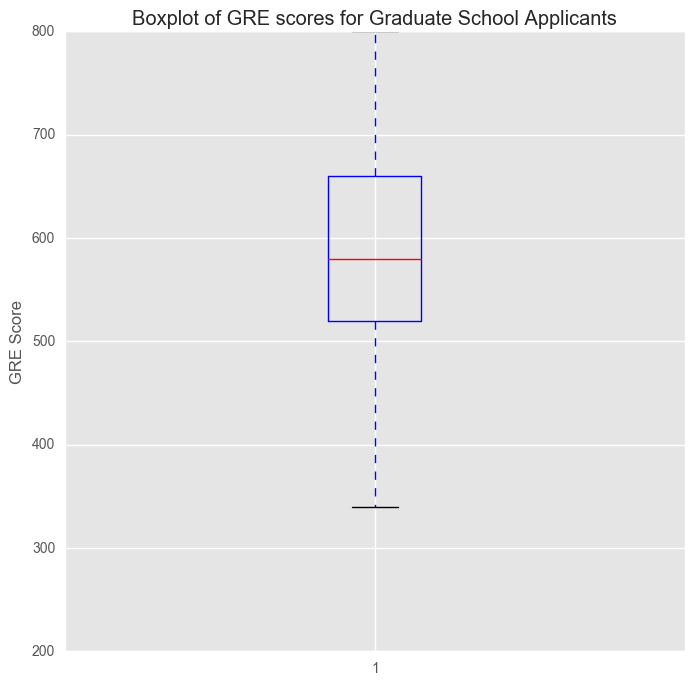

In [13]:
plt.figure(figsize=(8,8))
plt.boxplot(df_no_na.gre)
plt.title('Boxplot of GRE scores for Graduate School Applicants')
plt.ylabel('GRE Score')

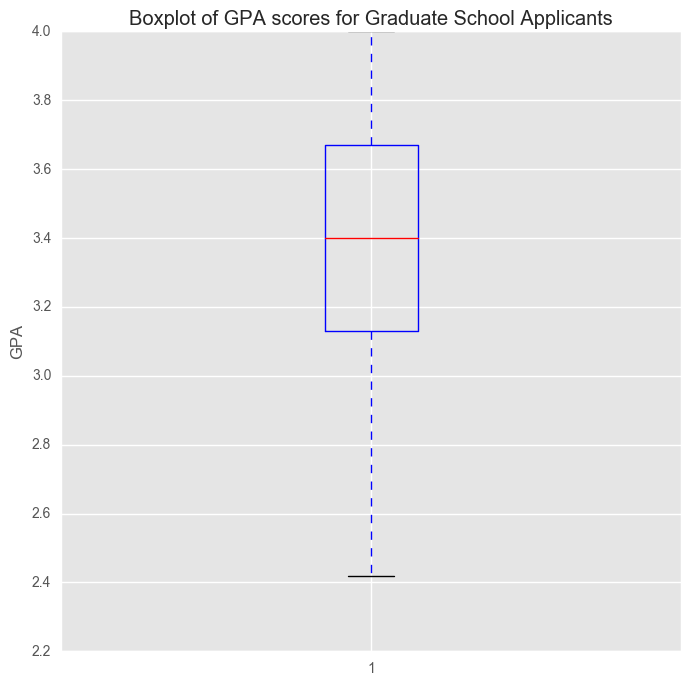

In [14]:
plt.figure(figsize=(8,8))
plt.boxplot(df_no_na.gpa)
plt.title('Boxplot of GPA scores for Graduate School Applicants')
plt.ylabel('GPA')

> ### Question 7.  What do boxplots show?

Answer: The boxplots show that the IQR for GPA is less than 0.6, while the IQR of GRE score is more like 150 points. The median values for GPA and GRE scores are approximately 580 and 3.4, respectively, and there don't seem to be any outliers in those variables for the data. 

> ### Question 8.  Plot the distribution of each variable.

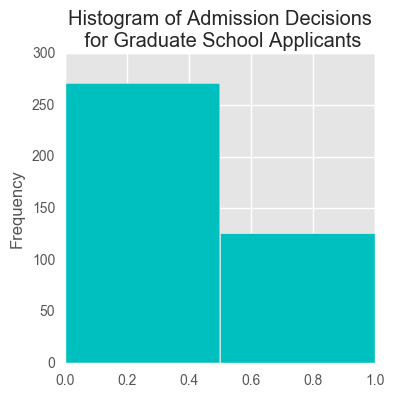

In [15]:
df_no_na.admit.plot(kind='hist',figsize = (4, 4),bins=2,color='c',
                    title='Histogram of Admission Decisions\n for Graduate School Applicants')

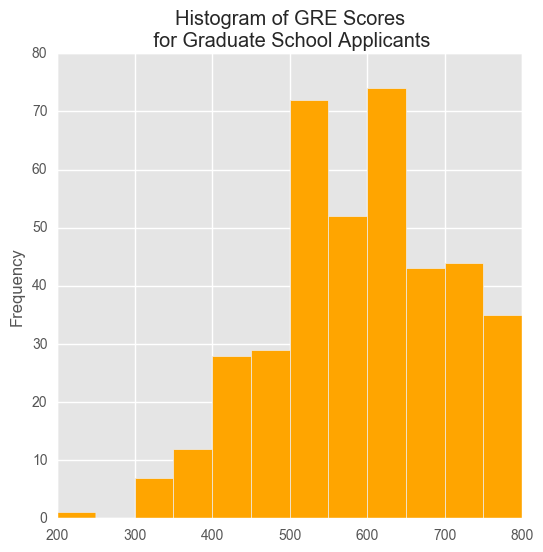

In [16]:
df_no_na.gre.plot(kind='hist',figsize = (6, 6),range=[200,800],bins=12,color='orange',
                    title='Histogram of GRE Scores\n for Graduate School Applicants')

admit
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: gre, dtype: object

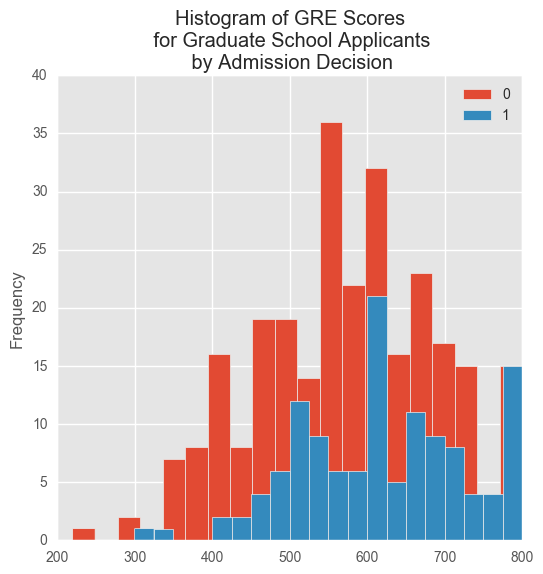

In [17]:
df_no_na.groupby('admit').gre.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                    title='Histogram of GRE Scores\n for Graduate School Applicants\n by Admission Decision')

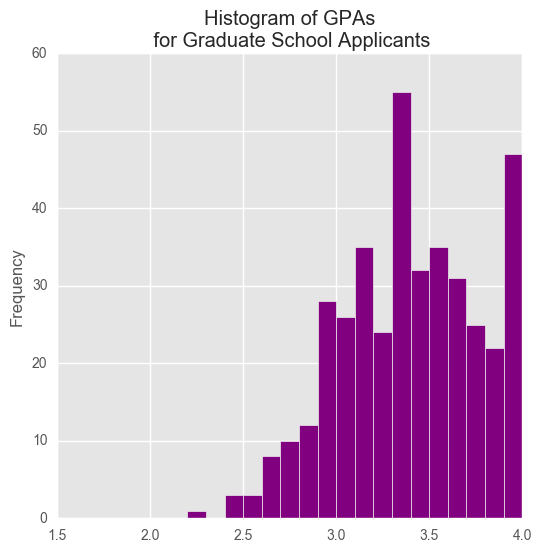

In [18]:
df_no_na.gpa.plot(kind='hist',figsize = (6, 6),range=[2,4],bins=20,color='purple',
                 title='Histogram of GPAs\n for Graduate School Applicants')

admit
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: gpa, dtype: object

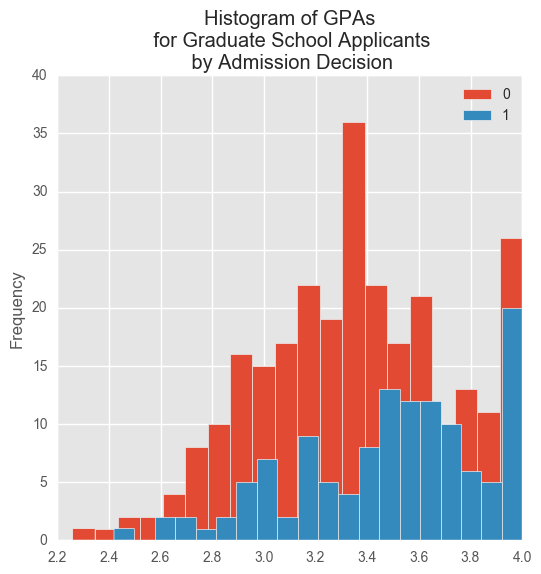

In [19]:
df_no_na.groupby('admit').gpa.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                                title='Histogram of GPAs\n for Graduate School Applicants\n by Admission Decision')

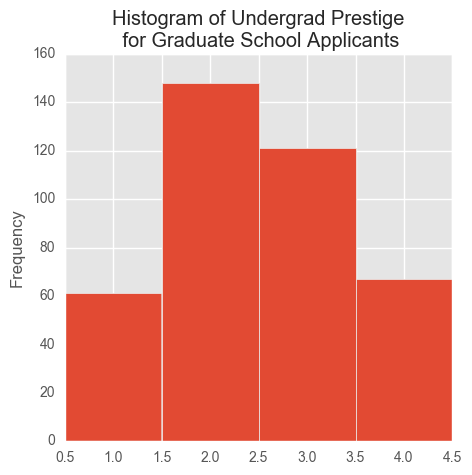

In [20]:
df_no_na.prestige.plot(kind='hist',figsize = (5, 5),bins=4,range=[0.5,4.5],
                       title='Histogram of Undergrad Prestige\n for Graduate School Applicants')

admit
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: prestige, dtype: object

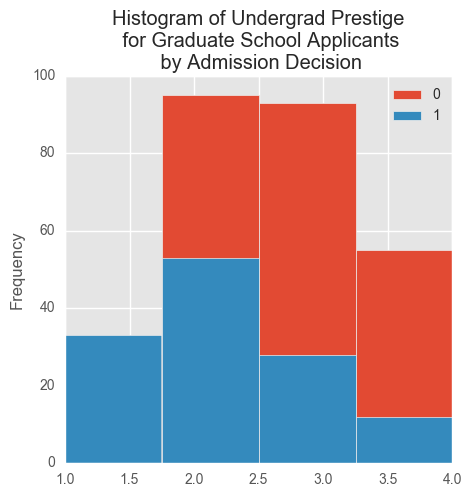

In [21]:
df_no_na.groupby('admit').prestige.plot(kind='hist',figsize = (5, 5),bins=4,legend=True,
                        title='Histogram of Undergrad Prestige\n for Graduate School Applicants\n by Admission Decision')
# Not a perfect graph, the bars are not stacked so the admitted students of prestige 1 are 
# hiding the size of the bar for not admitted students

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

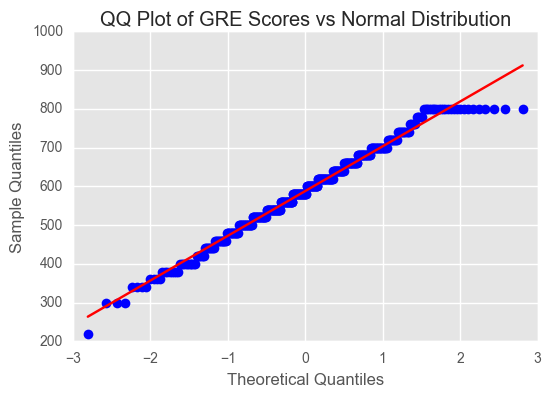

In [23]:
import statsmodels.api as sm
sm.qqplot(df_no_na.gre, line = 's')
plt.title('QQ Plot of GRE Scores vs Normal Distribution')
pass

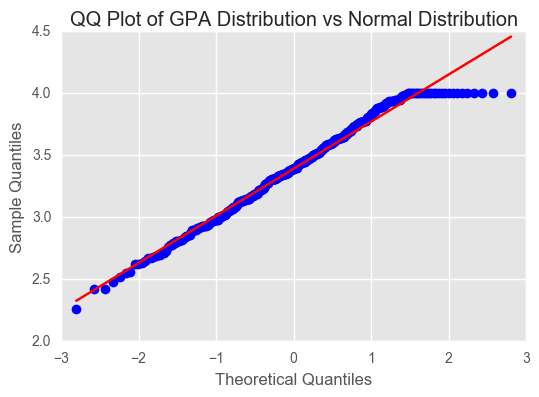

In [24]:
sm.qqplot(df_no_na.gpa, line = 's')
plt.title('QQ Plot of GPA Distribution vs Normal Distribution')
pass

Answer: If the model had an assumption for a normal distribution, it would hold true for values within the middle ranges of the data but the high extremes of the data do not conform to the normal distribution, resulting in overall skewed data. Their distributions would likely need correction because high GRE and GPA scores (the parts of each distribution that are not aligned with the normal distribution quantiles) are crucial to the classification task as the students are not uniformly either admitted or denied with scores for gre or gpa in these high ranges, so they are not data points that can be ignored because they provide no additional information. I am not sure how the data set could be corrected to make up for the distribution at the high end of the data, but it should be normal enough to give reasonable results for our model as is. 

> ### Question 10.  Create a correlation matrix for the dataset

In [25]:
corr=df_no_na.corr()
corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


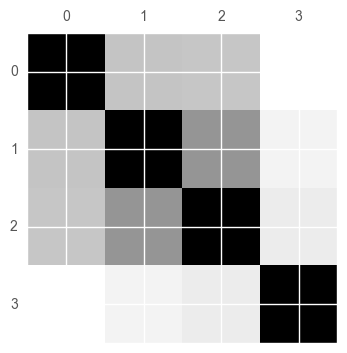

In [26]:
plt.matshow(corr)

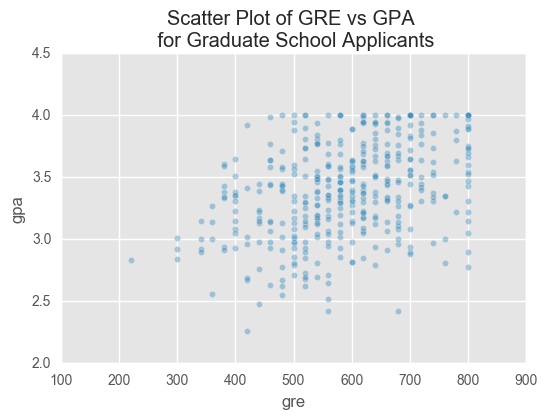

In [27]:
df_no_na.plot(kind='scatter', x='gre', y='gpa', alpha=0.4,
              title='Scatter Plot of GRE vs GPA \n for Graduate School Applicants')

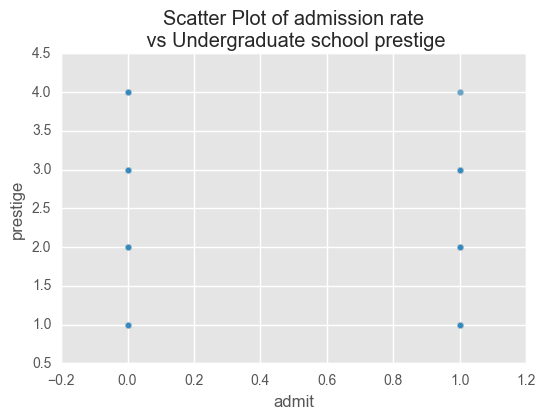

In [28]:
df_no_na.plot(kind='scatter', x='admit', y='prestige', alpha=0.1,
              title='Scatter Plot of admission rate\n vs Undergraduate school prestige')

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Most of our variables do not seem to have a strong potential for colinearity. The main exception to this is the pair gre and gpa, which show modest potential colinearity. Since prestige is a variable with the opposite trend of the others (lower numbers are more impressive for prestige, as 1 is highest prestige, whereas the other variables have higher numbers indicating better scores), so prestige is negatively correlated with the other three, and farily strongly (negatively) correlated with admission rates. Additionally, both gre and gpa are very weakly correlated with admit (admission status), but neither relationship seems substantial. 

## Issues/Limitations/Comments from EDA:

-Plots involving prestige and admission rate have only 2 or 4 possible values, so any type of scatter plot to attempt to glean colinearity involving one or both of those variables (like the one immediately above) can be harder to decipher than would a plot involving continuous varibles. Additional plot types needed.  

-With three variables to look at (for their role in predicting admission decision), it is difficult to see the influence each has on admission rate and likely all three have some predicting power if looked at together

-At the upper ends, GRE and GPA are not normally distributed, so assumptions that they are will lead us astray

-Three data points had missing data, so they will be dropped for analysis

-No apparent outliers are present (which is expected, since each variable is constrained to a known range), indicating remaining data is clean (no obvious erroneous data points)

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: For just exploring the association between graduate school admission rates and prestige of undergraduate schools (and not taking other two variables, gre and gpa, into consideration), I would have an analysis plan as follows:

1) Remove additional columns from dataframe with GPA and GRE data

2) Remove any rows in the dataframe with missing data for either prestige or admisison decision

3) Scale data to similar ranges

4) Split data into a test and train data set (test set to be 20% of data, train remaining)

5) Perform logistic regression analysis by training a model on the train data set with cross-validation to find the optimal parameters

6) Look at p and t values for the coefficents (for prestige and intercept) to determine if significantly different from 0

7) Train model again using all train data

8) Score model using test data to get an estimate of error rate

9) Train model one last time on all data for final model.

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that there is a modest (negative) relationship between graduate school admission rates and prestige of undergraduate school, but that the interaction between all three predictor variables will be crucial for more accurate prediction of admission. I predict that GRE and GPA will have a moderate positive association with admission, and that prestige of undergrad school will have a larger (but negative) association with the outcome. 